In [12]:
# yfinance is yahoo finance packge to get trading data.
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
rel_data = yf.download("RELIANCE.NS", start="2020-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [6]:
rel_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,1503.745972,1512.760498,1491.363403,1495.424927,1480.595947,6463060
2020-01-02 00:00:00+05:30,1497.802368,1526.480469,1497.802368,1520.883545,1505.802124,8173308
2020-01-03 00:00:00+05:30,1518.605103,1527.173950,1508.699097,1522.716187,1507.616577,9684434
2020-01-06 00:00:00+05:30,1505.727173,1513.552979,1483.933838,1487.400879,1472.651367,11315596
2020-01-07 00:00:00+05:30,1504.736572,1520.091064,1499.288208,1510.284058,1495.307617,7699489
...,...,...,...,...,...,...
2022-12-26 00:00:00+05:30,2514.750000,2542.000000,2492.399902,2524.050049,2524.050049,2764496
2022-12-27 00:00:00+05:30,2530.000000,2548.800049,2515.250000,2544.699951,2544.699951,2659749
2022-12-28 00:00:00+05:30,2538.000000,2549.800049,2521.500000,2544.449951,2544.449951,3442509


In [7]:
rel_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,747.000000,747.000000,747.000000,747.000000,747.000000,7.470000e+02
mean,2156.371332,2181.988597,2129.630310,2154.629290,2145.453786,1.087940e+07
std,415.183208,415.752307,414.603843,415.493372,418.484035,8.762279e+06
min,907.596863,941.079529,867.427673,875.748779,867.064575,7.871600e+05
25%,1962.750000,1980.299988,1935.750000,1958.625000,1946.484070,5.387111e+06
50%,2202.000000,2228.000000,2176.050049,2201.699951,2188.052246,7.973235e+06
75%,2494.500000,2519.500000,2464.500000,2493.424927,2488.724731,1.350081e+07
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,6.584835e+07


In [8]:
plt.style.use("seaborn")

<AxesSubplot:xlabel='Date'>

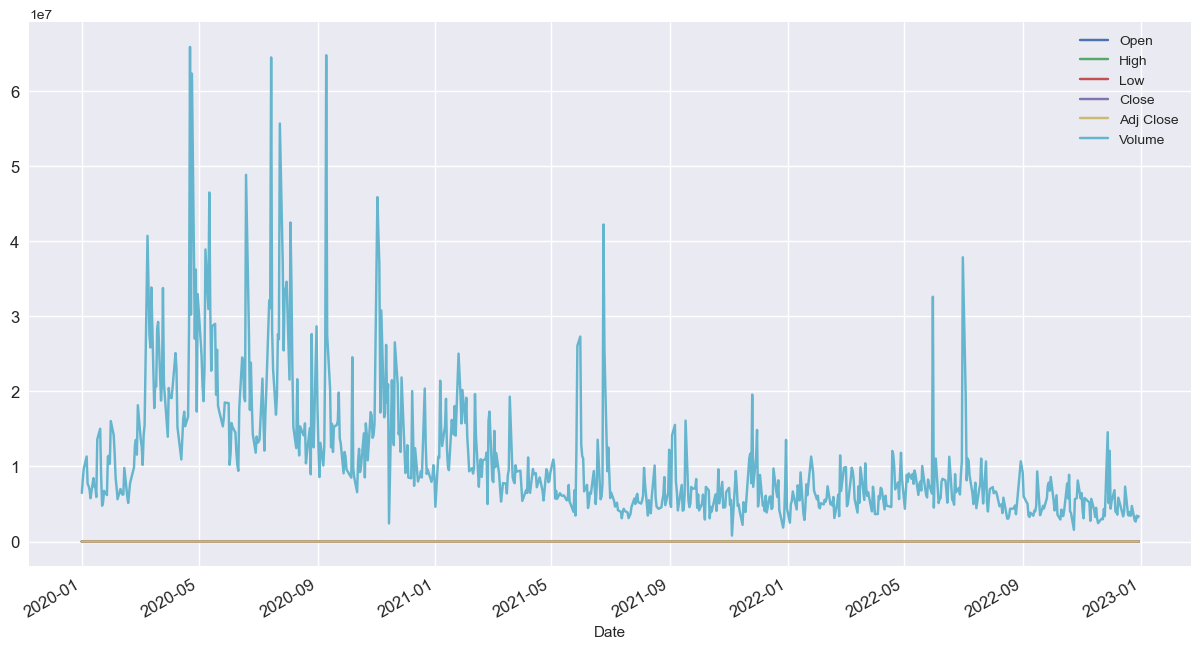

In [9]:
rel_data.plot(figsize=(15,8), fontsize=12)

In [3]:
## Price Normalization to common range:
#  - Make prices across the shares comparable.
#  e.g.: ITC price varies from 200 to 400, REL from 1500 to 4000.
#        Bring them down between 100 to 200 (Same price range so price compareason becomes easy)
##

In [43]:
rel_close = rel_data[["Close"]].copy()

In [44]:
print(rel_close)

                                 Close
Date                                  
2020-01-01 00:00:00+05:30  1495.424927
2020-01-02 00:00:00+05:30  1520.883545
2020-01-03 00:00:00+05:30  1522.716187
2020-01-06 00:00:00+05:30  1487.400879
2020-01-07 00:00:00+05:30  1510.284058
...                                ...
2022-12-26 00:00:00+05:30  2524.050049
2022-12-27 00:00:00+05:30  2544.699951
2022-12-28 00:00:00+05:30  2544.449951
2022-12-29 00:00:00+05:30  2543.300049
2022-12-30 00:00:00+05:30  2547.199951

[747 rows x 1 columns]


<AxesSubplot:xlabel='Date'>

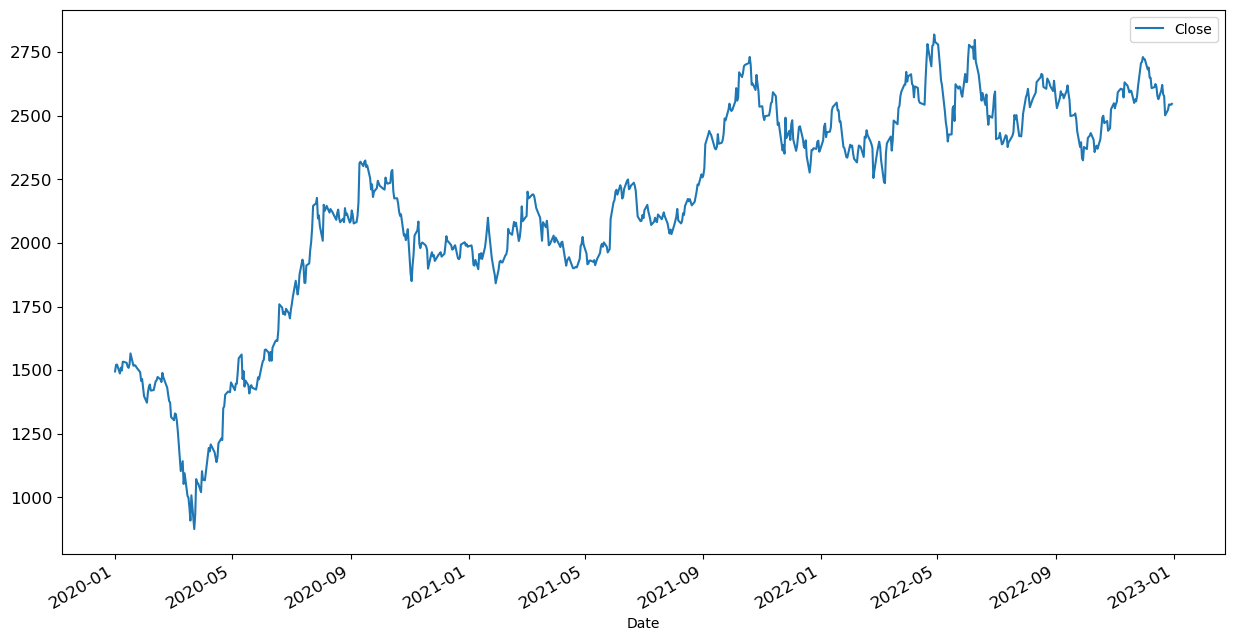

In [45]:
rel_close.plot(figsize=(15,8), fontsize=12)

In [46]:
old_min = min(rel_close["Close"])
old_max = max(rel_close["Close"])
new_min = 100
new_max = 200
rel_close["Norm"] = new_min + (((rel_close["Close"] - old_min) / float(old_max - old_min)) * (new_max - new_min))

<AxesSubplot:xlabel='Date'>

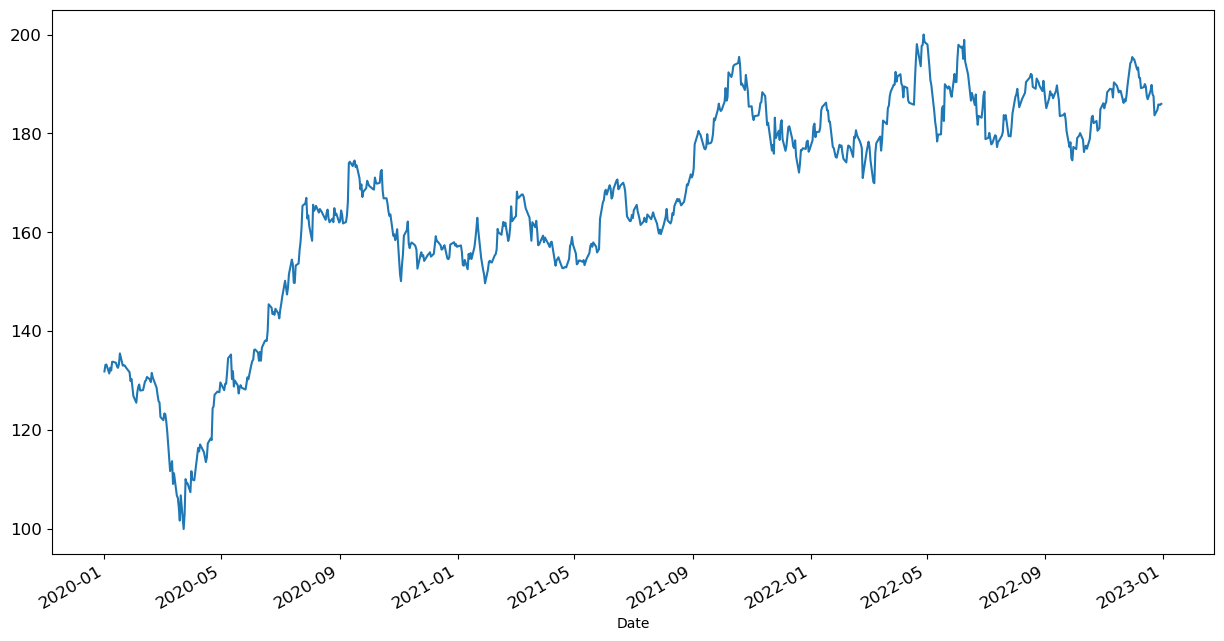

In [48]:
rel_close["Norm"].plot(figsize=(15,8), fontsize=12)

In [50]:
### Out[45] & Out[48] is same graph plot but different with price price ranges.
### Now we can consider another stock price & normalize to same price range for compareason.